In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\Supervised ML\Class work\Datasets\iphone_purchase_records.csv")
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


A naive bayes classifier is a probabilistic model that makes predictions based on Bayes' Theorem .The crux of the model is that it assumes that the features are independent of each other

C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Suyash Tambe\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

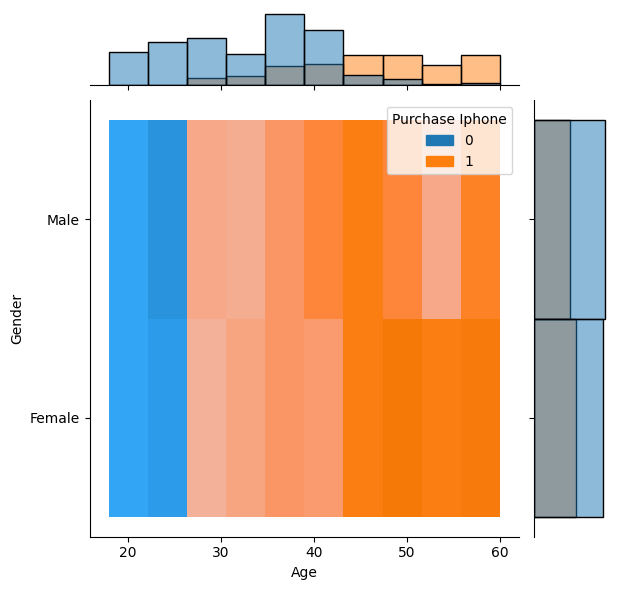

In [14]:
sns.jointplot(x='Age',y='Gender',hue='Purchase Iphone',data=df,kind='hist')

In [19]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print(x_test)

[[ 87000      0]
 [ 50000      0]
 [ 75000      0]
 [ 79000      0]
 [ 50000      0]
 [ 20000      0]
 [ 15000      0]
 [144000      1]
 [ 68000      0]
 [ 43000      0]
 [ 49000      0]
 [ 55000      0]
 [ 55000      0]
 [ 77000      0]
 [ 86000      0]
 [117000      0]
 [ 77000      0]
 [ 85000      0]
 [130000      1]
 [ 22000      0]
 [ 47000      0]
 [144000      1]
 [ 51000      0]
 [105000      1]
 [ 28000      0]
 [141000      1]
 [ 87000      0]
 [ 80000      0]
 [ 62000      0]
 [ 86000      0]
 [ 88000      0]
 [ 79000      1]
 [ 60000      1]
 [ 53000      0]
 [ 58000      0]
 [ 52000      0]
 [ 81000      0]
 [ 43000      0]
 [ 34000      0]
 [ 36000      1]
 [ 88000      0]
 [ 52000      0]
 [ 84000      0]
 [ 20000      0]
 [112000      1]
 [ 58000      0]
 [ 80000      0]
 [ 90000      1]
 [ 30000      0]
 [ 86000      1]
 [122000      1]
 [ 25000      0]
 [ 57000      0]
 [115000      0]
 [ 88000      1]
 [ 32000      1]
 [ 83000      0]
 [ 80000      0]
 [ 28000      

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test)

[[ 4.94607583e-01 -7.79769326e-01]
 [-5.77359062e-01 -7.79769326e-01]
 [ 1.46942725e-01 -7.79769326e-01]
 [ 2.62831011e-01 -7.79769326e-01]
 [-5.77359062e-01 -7.79769326e-01]
 [-1.44652121e+00 -7.79769326e-01]
 [-1.59138156e+00 -7.79769326e-01]
 [ 2.14601566e+00  1.28243054e+00]
 [-5.58617754e-02 -7.79769326e-01]
 [-7.80163563e-01 -7.79769326e-01]
 [-6.06331134e-01 -7.79769326e-01]
 [-4.32498705e-01 -7.79769326e-01]
 [-4.32498705e-01 -7.79769326e-01]
 [ 2.04886868e-01 -7.79769326e-01]
 [ 4.65635512e-01 -7.79769326e-01]
 [ 1.36376973e+00 -7.79769326e-01]
 [ 2.04886868e-01 -7.79769326e-01]
 [ 4.36663440e-01 -7.79769326e-01]
 [ 1.74040666e+00  1.28243054e+00]
 [-1.38857706e+00 -7.79769326e-01]
 [-6.64275277e-01 -7.79769326e-01]
 [ 2.14601566e+00  1.28243054e+00]
 [-5.48386991e-01 -7.79769326e-01]
 [ 1.01610487e+00  1.28243054e+00]
 [-1.21474464e+00 -7.79769326e-01]
 [ 2.05909944e+00  1.28243054e+00]
 [ 4.94607583e-01 -7.79769326e-01]
 [ 2.91803083e-01 -7.79769326e-01]
 [-2.29694204e-01 -7

In [37]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

In [38]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score,recall_score

In [39]:
y_pred = nb_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[58  0]
 [ 0 22]]
1.0
1.0
1.0
